<a href="https://colab.research.google.com/github/gracesjy/handsonml2/blob/main/01%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 무작정 따라하기

## 1장

In [ ]:
import sys
assert sys.version_info >= (3,7)

from packaging import version
import sklearn

print(sklearn.__version__)

1.2.2


In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [ ]:
import numpy as np
np.random.seed(42)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

print(type(X))

<class 'numpy.ndarray'>


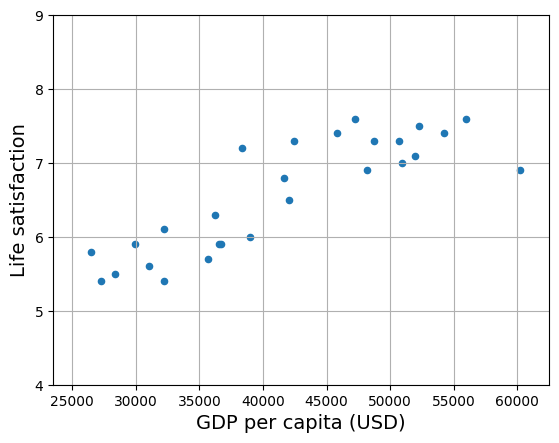

In [ ]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)",y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X,y)

X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


## K-nn 으로 모델 변경

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


## 이 부분은 상식 선에서 연습용으로 한번 해 보는 것

In [3]:
from pathlib import Path

IMAGES_PATH=Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [6]:
import urllib.request
import pandas as pd

datapath=Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = data_root + "lifesat/" + filename
    urllib.request.urlretrieve(url, datapath / filename)


In [31]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv",thousands=',')

In [8]:
oecd_bli['Indicator'].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [32]:
gdp_per_capita.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [33]:
gdp_year = 2020
gdppc_col = 'GDP per capita (USD)'
lifesat_col = 'Life satisfaction'
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita['Year'] == gdp_year]
gdp_per_capita.head(3)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913


In [34]:
gdp_per_capita = gdp_per_capita.drop(['Code','Year'], axis=1)
gdp_per_capita.head(3)

,Entity,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,1978.961579
49,Africa Eastern and Southern,3387.594670
80,Africa Western and Central,4003.158913


In [35]:
gdp_per_capita.columns = ['Country',gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [36]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN


In [37]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head(3)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3


In [38]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.head()
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats.head()


,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita (USD)
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,11466.189672
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,13441.492952
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,...,81.0,1.0,66.0,3.2,416.0,NaN,63.0,68.0,15.2,17887.750736
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,23324.524751


In [39]:
full_country_stats.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'GDP per capita (USD)'],
      dtype='object')

In [40]:
full_country_stats = full_country_stats[[gdppc_col,lifesat_col]]
full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [45]:
min_gdp = 23_500
max_gdp = 62_500
country_stats = full_country_stats[(full_country_stats[gdppc_col] > min_gdp)&
                                        (full_country_stats[gdppc_col] < max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


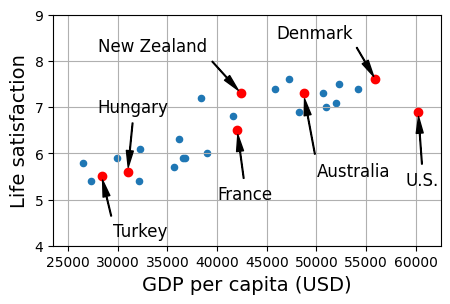

In [46]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [47]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


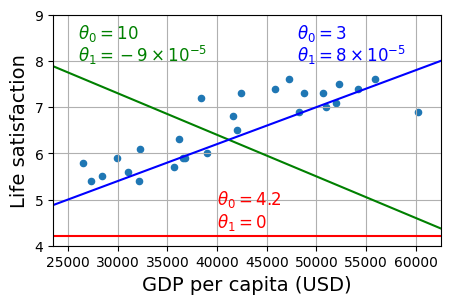

In [49]:
import numpy as np
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


plt.show()

In [52]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


In [53]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [54]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738056

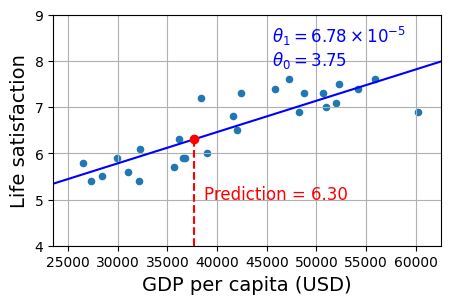

In [55]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [56]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [57]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

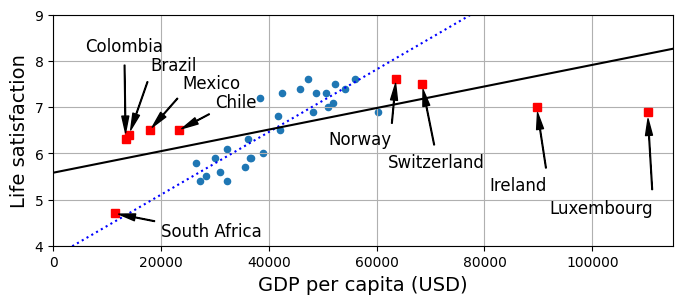

In [58]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()